# Combine plots
The goal is to combine multiple plots with the same y-axis length and scale side by side into a continuous plot.

First, make up some data

In [2]:
# Making up 2 sets of data
import numpy as np
x1 = np.linspace(0, 5, 100)
y1 = np.sin(x1)

x2 = np.linspace(0, 5, 100)
y2 = np.cos(x2)

Plot both data side by side as subplots to see

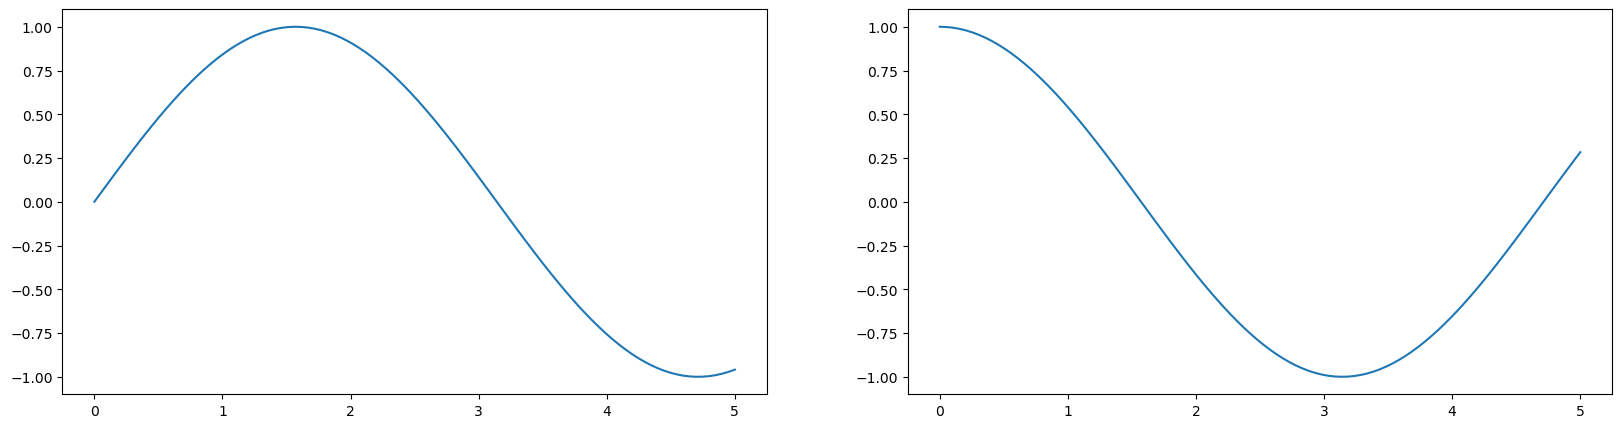

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(x1, y1)
ax[1].plot(x2, y2)


Combining the two plots now

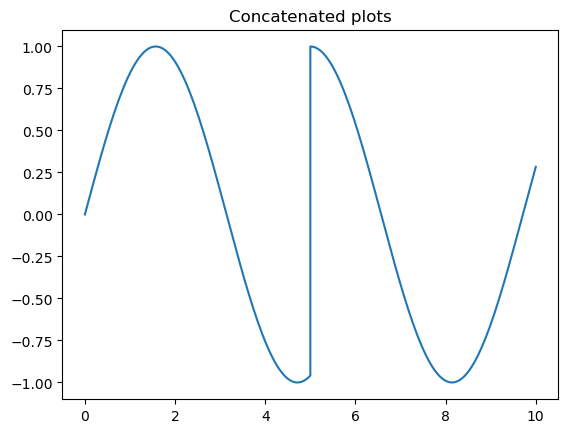

In [4]:
# Shift data2 so it comes after data1
x2_shifted = x2+x1[-1] 

# Concatenate
x = np.concatenate([x1, x2_shifted])
y = np.concatenate([y1, y2])

# Plot as one continuous curve
plt.plot(x, y)
plt.title("Concatenated plots")
plt.show()

## Trying it with 2 actual datasets (0031 and 0032)
Transposed data might cause issues

In [7]:
# Import necessary packages
import segyio
import numpy as np
import matplotlib.pyplot as plt
import os

folder_dir = "/Users/ming.../Desktop/Lab/Okavango/OK19_Dataprocessed" # Folder which includes all samples
file_names = os.listdir(folder_dir) # Sample names
num_files = len(file_names) # Count number of seismic traces

# Set up empty array to store all coords
sx_all = np.array([])
sy_all = np.array([])
sx_start_all = np.array([])
sx_end_all = np.array([])
sy_start_all = np.array([])
sy_end_all = np.array([])
line_num_all = []
tracelines = {}

# Loop through folder
for i in range (num_files):
    if file_names[i].endswith(".sgy"):
        with segyio.open(folder_dir + "/" + file_names[i], "r", ignore_geometry=True) as f:
            # Store source coordinates as an array
            sx = np.array([f.header[j][segyio.TraceField.SourceX] for j in range(f.tracecount)])
            sy = np.array([f.header[j][segyio.TraceField.SourceY] for j in range(f.tracecount)])
            dt = f.bin[segyio.BinField.Interval] / 1000  # collecting sample interval in ms
            time_axis = np.arange(f.samples.size) * dt
            # Take start and end coords of end trace line
            sx_start = sx[0]
            sx_end = sx[-1]
            sy_start = sy[0]
            sy_end = sy[-1]
            line_num = file_names[i].strip("Lineprocessed.sgy_")

            # Add them to sx_all and sy_all respectively
            sx_all = np.append(sx_all, sx)
            sy_all = np.append(sy_all, sy)
            sx_start_all = np.append(sx_start_all, sx_start)
            sx_end_all = np.append(sx_end_all, sx_end)
            sy_start_all = np.append(sy_start_all, sy_start)
            sy_end_all = np.append(sy_end_all, sy_end)
            line_num_all.append(line_num)

            # Store trace data
            data = np.zeros((f.tracecount, f.samples.size), dtype=np.float32) # Creates a canvas of zeros with the shape of (number of traces, number of samples)
            # fill the array with trace data
            for l in range(f.tracecount):
                data[l, :] = f.trace[l]
            tracelines[line_num] = data
            print(file_names[i])

Line0030_processed.sgy
Line0033_processed.sgy
Line0032_processed.sgy
Line0031_processed.sgy


In [11]:
# Only use 2 of the datasets for now (0031 and 0032)
trace0031 = tracelines["0031"]
trace0032 = tracelines["0032"]

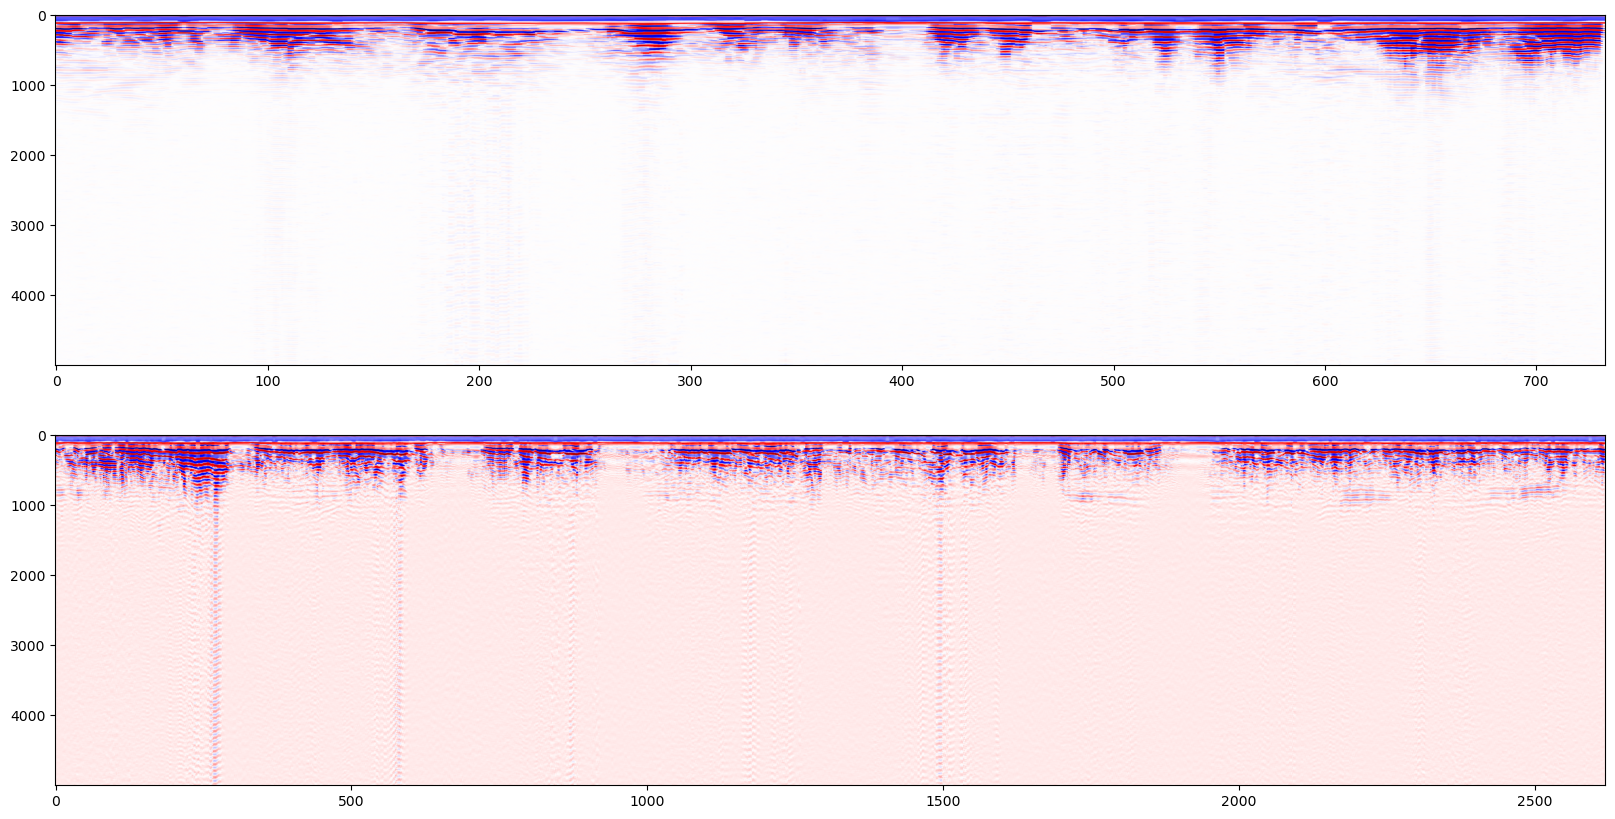

In [ ]:
# Plot two subplots of the two traces (note auto scale)
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].imshow(trace0031.T, cmap=plt.cm.seismic, aspect="auto")
ax[1].imshow(trace0032.T, cmap=plt.cm.seismic, aspect="auto")

In [27]:
# Define function to pad trace
def pad_trace(trace, n_samples_max):
    n_traces = trace.shape[0] # Get current trace shape
    padded = np.zeros((n_traces, n_samples_max)) # Make the padding of 0s to match the max trace samples
    padded[:, :trace.shape[1]] = trace # Now add the trace into the Padding
    return padded

In [30]:
# Pad sample to make TWT axis the same without losing data
n_samples_max = max(trace0031.shape[1], trace0032.shape[1])

trace0031_pad = pad_trace(trace0031, n_samples_max)
trace0032_pad = pad_trace(trace0032, n_samples_max)

trace_all = np.concatenate([trace0031_pad.T, trace0032_pad.T], axis=1)

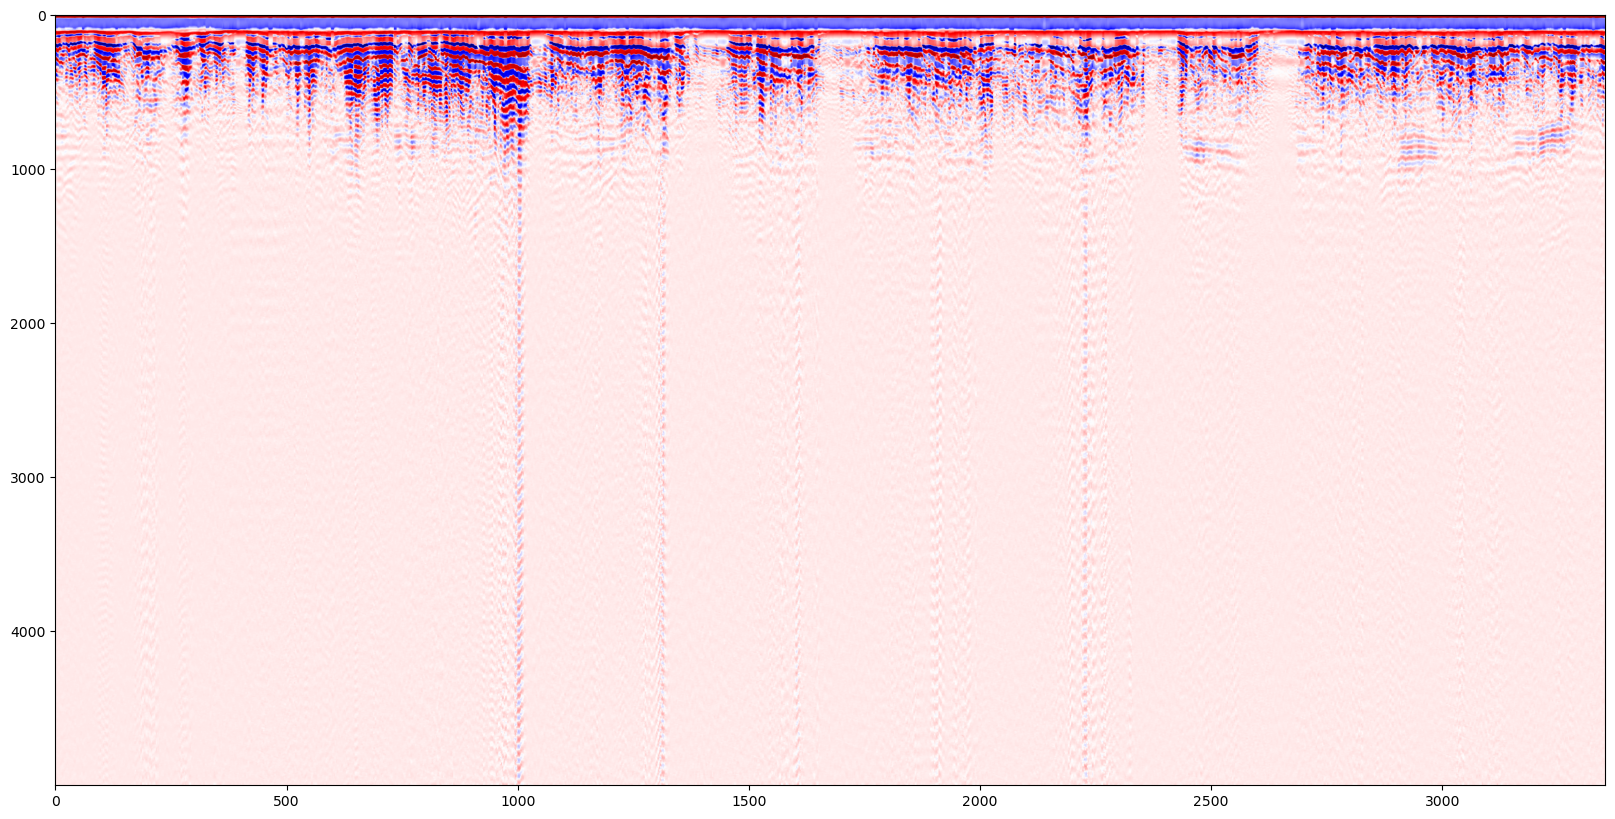

In [31]:
# Now plot the combined ones
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(trace_all, cmap=plt.cm.seismic, aspect="auto")

## Loop through all
Script to loop through all files and concatenate them.

In [50]:
# Load in files
# Import necessary packages
import segyio
import numpy as np
import matplotlib.pyplot as plt
import os

folder_dir = "/Users/ming.../Desktop/Lab/Okavango/OK19_Dataprocessed" # Folder which includes all samples
file_names = os.listdir(folder_dir) # Sample names
num_files = len(file_names) # Count number of seismic traces

# Set up empty array to store all coords
sx_all = np.array([])
sy_all = np.array([])
sx_start_all = np.array([])
sx_end_all = np.array([])
sy_start_all = np.array([])
sy_end_all = np.array([])
line_num_all = []
tracelines = {}

# Loop through folder
for i in range (num_files):
    if file_names[i].endswith(".sgy"):
        with segyio.open(folder_dir + "/" + file_names[i], "r", ignore_geometry=True) as f:
            # Store source coordinates as an array
            sx = np.array([f.header[j][segyio.TraceField.SourceX] for j in range(f.tracecount)])
            sy = np.array([f.header[j][segyio.TraceField.SourceY] for j in range(f.tracecount)])
            dt = f.bin[segyio.BinField.Interval] / 1000  # collecting sample interval in ms
            time_axis = np.arange(f.samples.size) * dt
            # Take start and end coords of end trace line
            sx_start = sx[0]
            sx_end = sx[-1]
            sy_start = sy[0]
            sy_end = sy[-1]
            line_num = file_names[i].strip("Lineprocessed.sgy_")

            # Add them to sx_all and sy_all respectively
            sx_all = np.append(sx_all, sx)
            sy_all = np.append(sy_all, sy)
            sx_start_all = np.append(sx_start_all, sx_start)
            sx_end_all = np.append(sx_end_all, sx_end)
            sy_start_all = np.append(sy_start_all, sy_start)
            sy_end_all = np.append(sy_end_all, sy_end)
            line_num_all.append(line_num)

            # Store trace data
            data = np.zeros((f.tracecount, f.samples.size), dtype=np.float32) # Creates a canvas of zeros with the shape of (number of traces, number of samples)
            # fill the array with trace data
            for l in range(f.tracecount):
                data[l, :] = f.trace[l]
            tracelines[line_num] = data
            print(file_names[i])

# Select files to concatenate (0031, 0032, 0033)
files_to_concatenate = [31, 32, 33] # Can be any numbers you choose

# Pad them into the correct format
files = [f"{f:04d}" for f in files_to_concatenate]

#store shapes
n_samples = []
for i in files:
    shape = tracelines[i].shape[1]
    n_samples.append(shape)


# Pad the files to make shapes compatible
n_samples_max = max(n_samples) # Find max shape
trace_all = [] # array of all traces

# Pad all samples
for i in files:
    #tracename = "trace"+files[i]+"_pad"
    padded = pad_trace(tracelines[i], n_samples_max)
    trace_all.append(padded.T) # All padded traces together into an array

traces_concatenated = np.concatenate(trace_all, axis=1)

Line0030_processed.sgy
Line0033_processed.sgy
Line0032_processed.sgy
Line0031_processed.sgy


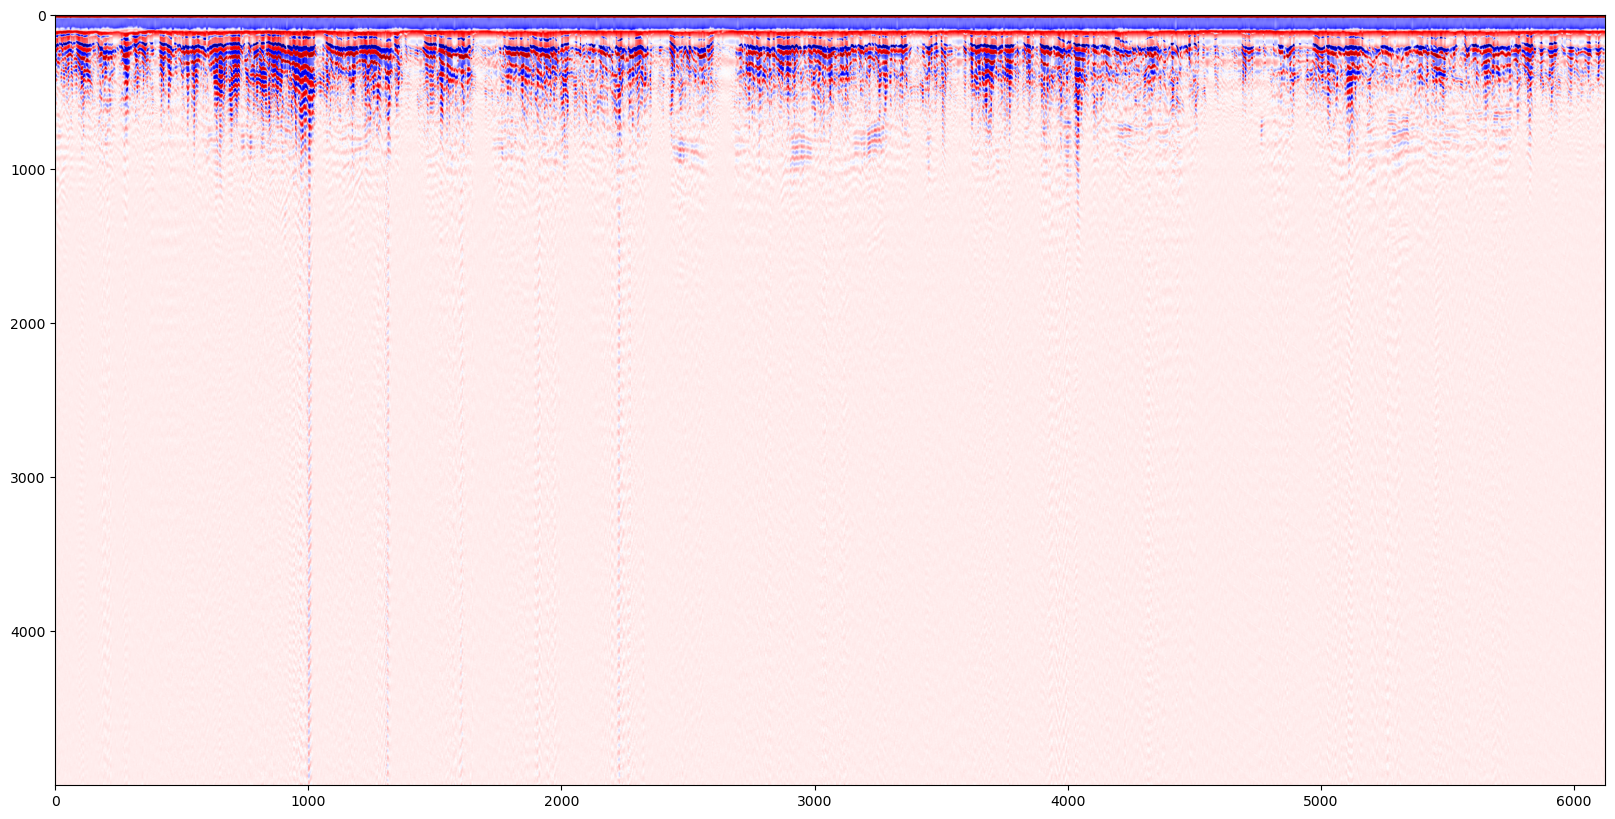

In [51]:
# Now plot the combined ones
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(traces_concatenated, cmap=plt.cm.seismic, aspect="auto")